# Rapport SAE S2.02

In [1]:
# Importations des bibliothèques utilisées dans le rapport
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.image as img

Groupe G4-E : 
    Bougeard Bastien,
    Delin Alexis,
    Rouge Gabriel

## Partie 1 : PageRank - version itérative, premier exemple

### 1)

Une fois ce graphe converti en matrice d'adjacence, nous pouvons lui appliquer l'algorithme de la puissance itérée. Il sert à trouver une approximation du vecteur propre d'une matrice. Ainsi, chaque valeur propre du vecteur correspond à un sommet, soit au score de la page Web signifiée par ledit sommet. Ainsi, cet algorithme permet de trouver le score approximatif de chaque site traduit sur le graphe donné.

### 2)

In [2]:
def norme (X) :
    # Donne la norme de X
    # X : vecteur
    res = 0
    for i in X :
        res += i**2
    return np.sqrt(res)

def matriceDeTransition(q):
    # Donne la matrice de tranisition correspondante
    # q : matrice d'adjacence 
    # N : ordre de la matrice q
    # Q : matrice de transition (résultat)
    #  - .dot permet de faire un produit de deux np.array
    #  - .sum fait la somme des éléments d'un np.array
    N = len(q)
    Q = np.zeros((N,N))
    for i in range(N):
        for j in range(N):
            Nj = np.sum(q[i])
            if Nj!=0:
                Q[i][j] = q[i][j]/Nj
    return Q

def puissanceIteree(M, seuil):
    # Algorithme de puissance itérée
    # M : matrice
    # x : vecteur pris aléatoirement dans M
    # x1 : vecteur
    # seuil : très petit nombre décimal tel 1e-10
    x = M[random.randint(0,len(M)-1)]
    y = 1/norme(x.dot(M))*x.dot(M)
    while norme(y-x) > seuil  :
        x = y
        y = 1/norme(x.dot(M))*x.dot(M)
    return y


In [3]:
# Matrice d'adjascence du graphe donné où N = 14
graph1 = np.array([[0,1,1,1,1,1,0,0,0,0,0,0,0,0]
                  ,[1,0,1,0,0,0,0,0,0,0,0,0,0,0]
                  ,[1,0,0,1,0,0,0,0,0,0,0,0,0,0]
                  ,[1,0,0,0,1,0,0,0,0,0,0,0,0,0]
                  ,[1,1,0,0,0,0,0,0,0,0,0,0,0,0]
                  ,[0,0,0,0,0,0,1,1,1,0,0,0,0,0]
                  ,[1,0,0,0,0,0,0,1,0,0,0,0,0,0]
                  ,[0,0,0,0,0,1,0,0,0,0,0,0,0,0]
                  ,[0,0,0,0,0,0,0,1,0,1,0,0,0,0]
                  ,[0,0,0,0,0,1,0,0,0,0,1,1,1,1]
                  ,[0,0,0,0,0,0,0,0,0,1,0,1,0,0]
                  ,[0,0,0,0,0,0,0,0,0,1,0,0,1,0]
                  ,[0,0,0,0,0,0,0,0,0,1,0,0,0,1]
                  ,[0,0,0,0,0,0,0,0,0,1,1,0,0,0]])

tmpMat = matriceDeTransition(graph1)
print(puissanceIteree(tmpMat, 1e-10))

[0.41959068 0.16783627 0.16783627 0.16783627 0.16783627 0.50350881
 0.16783627 0.33567254 0.16783627 0.41959068 0.16783627 0.16783627
 0.16783627 0.16783627]


### 3)

Le vecteur propre est comme attendu d'ordre N (14) soit l'ordre du graphe que représente la matrice d'adjacence. Ainsi, chaque valeur propre correspond au score d'un sommet du graphe. 

On observe en effet que le sommet 1, 6 et 8 ont un score plus élevé que les autres puisqu'ils ont une quantité importante d'arcs orientés vers eux. A l'inverse, les autres sommets ont tous un seul arc entrant et ont donc tous le même score ( environ 1,7 ).

Puisque le résultat est cohérent, on en déduit que l'algorithme implémenté fonctionne, jusqu'à preuve du contraire.

## Partie 2 : PageRank - version itérative, deuxième exemple

### 1)

In [4]:
# Matrice d'adjascence du graphe donné où N = 5
graph2 = np.array([[0,0,0,0,0],
                  [1,0,0,0,0],
                  [1,0,0,0,0],
                  [1,1,1,0,0],
                  [1,1,0,0,0]])

In [5]:
tmpMat = matriceDeTransition(graph2)
print(puissanceIteree(tmpMat, 1e-10))

[nan nan nan nan nan]


C:\Users\Gabriel\AppData\Local\Temp\ipykernel_27064\3022258337.py:35: RuntimeWarning: divide by zero encountered in double_scalars
  y = 1/norme(x.dot(M))*x.dot(M)
C:\Users\Gabriel\AppData\Local\Temp\ipykernel_27064\3022258337.py:35: RuntimeWarning: invalid value encountered in multiply
  y = 1/norme(x.dot(M))*x.dot(M)


On observe que la fonction provoque avec ce graphe en paramètre un message d'erreur de type division par 0. 

Le seul endroit où une division est faite est à cette ligne : 

    x1 = 1/norme(x.dot(M))*x.dot(M)
Il n'y a qu'une seule division dans cette ligne. Ainsi, pour que "1/norme(x.dot(M))\*x.dot(M)" soit égal à 0, soit le produit de M et de x est nul, soit la norme de ce produit est nulle. La fonction norme(X) n'effectue aucune opération susceptible de rendre son résultat nul (aucune addition/soustraction, ...). On en conclue qu'il s'agit du produit de x et M qui est nul, ainsi, au moins l'une de ces deux valeur est nulle. Rappelons que x est un vecteur pris aléatoirement dans la matrice M.

On remarque que la matrice d'adjacence de ce graphe présente en effet au moins une entrée composée de 5 zéros (où N = 5). Il est donc certain que x prenne à un moment donné la valeur de [0,0,0,0,0]. Là est l'origine de l'erreur.

On en conclue que notre algorithme est à revoir puisqu'il ne devrait pas présenter d'erreur. Des modifications à la fonction "matriceDeTransition(q)" sont à apporter.

### 2)

In [6]:
def matriceDeTransitionV2(p, alpha):
    # Donne la matrice de tranisition correspondante, version améliorée
    # p : matrice d'adjacence 
    # N : ordre de la matrice p
    # P : matrice de transition (résultat)
    # alpha : facteur d'amortissement
    N = len(p)
    P = np.zeros((N,N))
    for i in range(N):
        for j in range(N):
            Nj = np.count_nonzero(p[i])
            if Nj!=0:
                P[i][j] = alpha*p[i][j]+((1-alpha)/N)
            else:
                P[i][j] = 1/N
    return P

In [7]:
tmpMat = matriceDeTransitionV2(graph2, 0.85)
print(puissanceIteree(tmpMat, 1e-10))

[0.848723   0.38834904 0.27552341 0.16269779 0.16269779]


Avec cette nouvelle matrice de tansition, le problème rencontré ne survient plus. 

On remarque encore une fois que le score est cohérent ; le sommet 1 a le plus haut score et la plus grande quantité d'arcs entrants, les sommets 4 et 5 n'ont aucun arc entrant et ont le plus petit score... 

Ainsi, et encore une fois jusqu'à preuve du contraire, on en déduit que l'algorithme fonctionne. 

Formons de cette manière la fonction PageRank qui sera utilisée dans le reste du rapport : 

In [8]:
def PageRank (matrice, alpha, seuil) :
    return puissanceIteree(matriceDeTransitionV2(matrice, alpha), seuil)

## Partie 3 : PageRank - version itérative, analyse

### 1) Influence du critère d'arrêt (seuil)

Pour analyser l'influence du seuil dans l'algorithme de puissance iterée, nous devons prendre un seul graphe  et un seul facteur d'amortissement sur lesquels on va faire varier le seuil afin d'observer les résultats.

Ensuite, nous ferons une conclusion en comparant ces résultats et déduisant le sens de ces différences.

##### Variation avec seuil entre 1e-2 et 1e-10 : seuil petit

In [9]:
for i in range (2,12,2) : 
    seuil = 1*10**i
    print("Seuil = 1e-",i," : \n",PageRank(graph1, 0.85, seuil))

Seuil = 1e- 2  : 
 [0.03061174 0.01781503 0.01781503 0.01781503 0.01781503 0.69888447
 0.01354946 0.0220806  0.01354946 0.03061174 0.35621697 0.35621697
 0.35621697 0.35621697]
Seuil = 1e- 4  : 
 [0.02876724 0.01674159 0.01674159 0.01674159 0.01674159 0.33876182
 0.01273304 0.02075014 0.01273304 0.34677892 0.33475327 0.33475327
 0.65276494 0.33475327]
Seuil = 1e- 6  : 
 [0.02876724 0.01674159 0.01674159 0.01674159 0.01674159 0.33876182
 0.01273304 0.02075014 0.01273304 0.34677892 0.33475327 0.33475327
 0.33475327 0.65276494]
Seuil = 1e- 8  : 
 [0.02876724 0.01674159 0.01674159 0.01674159 0.01674159 0.33876182
 0.01273304 0.02075014 0.01273304 0.34677892 0.33475327 0.33475327
 0.33475327 0.65276494]
Seuil = 1e- 10  : 
 [0.04320579 0.02222012 0.02222012 0.02222012 0.02222012 0.02921534
 0.57017929 0.58416973 0.57017929 0.04320579 0.02222012 0.02222012
 0.02222012 0.02222012]


##### Variation avec seuil entre 1e-20 et 1e-200 : seuil très petit

In [10]:
for i in range (40,201,40) : 
    seuil = 1*10**i
    print("Seuil = 1e-",i," : \n",PageRank(graph1, 0.85, seuil))

Seuil = 1e- 40  : 
 [0.02876724 0.01674159 0.01674159 0.01674159 0.01674159 0.33876182
 0.01273304 0.02075014 0.01273304 0.34677892 0.33475327 0.33475327
 0.33475327 0.65276494]
Seuil = 1e- 80  : 
 [0.04320579 0.02222012 0.02222012 0.02222012 0.02222012 0.02921534
 0.57017929 0.58416973 0.57017929 0.04320579 0.02222012 0.02222012
 0.02222012 0.02222012]
Seuil = 1e- 120  : 
 [0.03061174 0.35621697 0.35621697 0.35621697 0.35621697 0.69888447
 0.01354946 0.0220806  0.01354946 0.03061174 0.01781503 0.01781503
 0.01781503 0.01781503]
Seuil = 1e- 160  : 
 [0.34677892 0.65276494 0.33475327 0.33475327 0.33475327 0.33876182
 0.01273304 0.02075014 0.01273304 0.02876724 0.01674159 0.01674159
 0.01674159 0.01674159]
Seuil = 1e- 200  : 
 [0.02876724 0.01674159 0.01674159 0.01674159 0.01674159 0.33876182
 0.01273304 0.02075014 0.01273304 0.34677892 0.65276494 0.33475327
 0.33475327 0.33475327]


##### Variation avec seuil entre 40 et 200 : seuil grand

In [11]:
for i in range (2,12,2) : 
    seuil = i
    print("Seuil =",i," : \n",PageRank(graph1, 0.85, seuil))

Seuil = 2  : 
 [0.34677892 0.33475327 0.33475327 0.65276494 0.33475327 0.33876182
 0.01273304 0.02075014 0.01273304 0.02876724 0.01674159 0.01674159
 0.01674159 0.01674159]
Seuil = 4  : 
 [0.81914142 0.21637143 0.21637143 0.21637143 0.21637143 0.02045034
 0.21387031 0.21887255 0.21387031 0.02545258 0.01794922 0.01794922
 0.01794922 0.01794922]
Seuil = 6  : 
 [0.02545258 0.01794922 0.01794922 0.01794922 0.01794922 0.02045034
 0.21387031 0.21887255 0.21387031 0.81914142 0.21637143 0.21637143
 0.21637143 0.21637143]
Seuil = 8  : 
 [0.34677892 0.33475327 0.33475327 0.65276494 0.33475327 0.33876182
 0.01273304 0.02075014 0.01273304 0.02876724 0.01674159 0.01674159
 0.01674159 0.01674159]
Seuil = 10  : 
 [0.39115876 0.02313823 0.02313823 0.02313823 0.02313823 0.38221899
 0.01866834 0.73682987 0.01866834 0.39115876 0.02313823 0.02313823
 0.02313823 0.02313823]


##### Variation avec seuil entre 40 et 200 : seuil très grand

In [12]:
for i in range (40,201,40) : 
    print("Seuil =",i," : \n",PageRank(graph1, 0.85, i))

Seuil = 40  : 
 [0.03061174 0.35621697 0.35621697 0.35621697 0.35621697 0.69888447
 0.01354946 0.0220806  0.01354946 0.03061174 0.01781503 0.01781503
 0.01781503 0.01781503]
Seuil = 80  : 
 [0.39115876 0.02313823 0.02313823 0.02313823 0.02313823 0.38221899
 0.01866834 0.73682987 0.01866834 0.39115876 0.02313823 0.02313823
 0.02313823 0.02313823]
Seuil = 120  : 
 [0.81914142 0.21637143 0.21637143 0.21637143 0.21637143 0.02045034
 0.21387031 0.21887255 0.21387031 0.02545258 0.01794922 0.01794922
 0.01794922 0.01794922]
Seuil = 160  : 
 [0.34677892 0.33475327 0.33475327 0.65276494 0.33475327 0.33876182
 0.01273304 0.02075014 0.01273304 0.02876724 0.01674159 0.01674159
 0.01674159 0.01674159]
Seuil = 200  : 
 [0.03061174 0.35621697 0.35621697 0.35621697 0.35621697 0.69888447
 0.01354946 0.0220806  0.01354946 0.03061174 0.01781503 0.01781503
 0.01781503 0.01781503]


Il est logique que au plus le seuil est petit, au plus l'approximation est proche du score exact. Ainsi, on prendra ce score comme référence pour observer l'écart des autres.

En observation, on remarque que certains score oscillent puisqu'ils augmentent grandement puis réduisent grandement lorsqu'on augmente ou diminue le seuil. Voir : seuil de 1e-4 à 1e-10. On en déduit que le score véritable est dans cette intervalle. Si on se concentre sur le score du sommet 2, on voit qu'à un petit seuil le score oscille entre 0.652 et 0.016. Ensuite, si l'on regarde son score à un seuil de 1e-200 où le score est de 0.0167, notre hypothèse se confirme.

Certains scores supposés bas sont anormalements élevés à certains seuils tandis que d'autres supposés hauts sont anormalements bas. Peut être notre algorithme présente-t-il un problème. 

On observe aussi qu'au plus le seuil est élevé, au plus les scores sont proches. Voir : seuil très grand. On constate que l'étendue pour le seuil à 200 par exemple va de 0.22 à 0.58 tandis que pour le seuil à 1e-200 elle va de 0.016 à 0.65. Cette propriété nous confirme qu'un seuil très bas est plus juste.

Nous avons ainsi regardé une quantité suffisantes de plusieurs cas divers et avons apporté des conclusions à chacune de nos observations.

### 2) Influence des Hubs et des Autorités

Pour cette analyse, nous devrons créer une nouvelle matrice d'adjacence qui représentera un graphe avec des hubs (sommet avec beaucoup d'arcs sortants) et des autorités (sommet avec beaucoup d'arcs entrants).

In [13]:
graph3 = np.array([[0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,1,1,0,1]
                  ,[1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0]
                  ,[1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0]
                  ,[1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0]
                  ,[1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0]
                  ,[0,0,0,0,0,0,1,1,1,0,0,0,0,0,1,0,1,0,1]
                  ,[1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1]
                  ,[0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0]
                  ,[0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,1,0]
                  ,[0,0,0,0,0,1,0,0,0,0,1,1,1,1,0,0,1,0,1]
                  ,[0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0]
                  ,[0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,1]
                  ,[0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,1,0]
                  ,[0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0]
                  ,[1,1,1,1,1,0,1,0,1,1,1,1,0,1,0,1,0,0,0]#Hub
                  ,[0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1]#Autorité
                  ,[0,0,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,1]#Autorité
                  ,[1,0,1,0,1,1,1,0,1,0,1,1,1,0,0,1,1,0,0]#Hub
                  ,[1,1,1,1,0,1,1,1,1,1,0,0,1,1,0,1,1,0,0]])#Hub

In [14]:
print("Graphe 1 avec 3 Hubs et 2 Autorités : \n",PageRank(graph3, 0.85, 1e-10))

Graphe 1 avec 3 Hubs et 2 Autorités : 
 [0.27033721 0.15777261 0.2496386  0.1655906  0.20136584 0.25823346
 0.20898436 0.15616053 0.15290112 0.21305159 0.18578872 0.12613409
 0.140363   0.20784055 0.15836982 0.34629046 0.42743695 0.18339012
 0.305882  ]


Théoriquement, le score des autorités devrait être élevé tandis que le score des Hubs devrait être dans la moyenne. Si on observe le résultat, c'est en effet le cas. Les deux autorités ont le score le plus haut (0.43 et 0.35), et les trois hubs ont un score moyen autant que les sommets du graphe initial.

Ainsi, avoir augmenté d'autant le nombre d'arcs entrant dans un seul sommet réduit l'écart des scores. La valeur du score le plus élevé était avant d'environ 0.65, tandis qu'ici, l'autorité la plus importante a un score de 0.42. En conséquence, puisque la valeur du score le plus élevé est plus bas, alors les autres scores sont plus concentrés (il y a moins d'écart entre les valeurs).


Cette conséquence est un effet négatif, car cette concentration des score obstrue la visibilité de l'information et rendra moins pertinent de potentielles données statistiques faites dessus.

### 3) Méthode d'acroissement du score

D'après les analyses déjà faites, il y a deux méthodes pour accroître le score d'un sommet.

La première consiste simplement à augmenter le nombre d'arcs rentrants sur ce sommet ; puisque le score est basé sur ce paramètre.

Rappelons que la valeur maximum du vecteur a pour effet de compresser les autres scores en dessous de cette valeur. Cette compression est d'autant plus importante lorsque l'autorité a beaucoup plus d'arcs entrant que les autres sommets.

Ainsi, si on réduit le nombre d'arcs entrants de l'autorité la plus importante, ou même si on supprime le sommet du graphe, cela aura pour conséquence d'augmenter le score de tous les autres sommets.\n",

Cela fait au total trois méthodes : augmenter les arcs entrants, réduire le score de l'autorité la plus importante, ou supprimer l'autorité la plus importante. En voici une démonstration. Nous prendrons la matrice d'adjacence du premier graphe et chercherons à accroître le score du sommet 7 (puisque c'est un sommet au score très bas). Les autorités les plus importantes de ce graphe sont les sommets 1 et 10 ; il faudra ainsi faire les mêmes opérations sur ces deux sommets car ils ont le même score.

In [15]:
#                                       7
graph1Augmente = np.array([[0,1,1,1,1,1,1,0,0,0,0,0,0,0]
                          ,[1,0,1,0,0,0,0,0,0,0,0,0,0,0]
                          ,[1,0,0,1,0,0,1,0,0,0,0,0,0,0]
                          ,[1,0,0,0,1,0,1,0,0,0,0,0,0,0]
                          ,[1,1,0,0,0,0,1,0,0,0,0,0,0,0]
                          ,[0,0,0,0,0,0,1,1,1,0,0,0,0,0]
                          ,[1,0,0,0,0,0,1,1,0,0,0,0,0,0]
                          ,[0,0,0,0,0,1,0,0,0,0,0,0,0,0]
                          ,[0,0,0,0,0,0,1,1,0,1,0,0,0,0]
                          ,[0,0,0,0,0,1,1,0,0,0,1,1,1,1]
                          ,[0,0,0,0,0,0,0,0,0,1,0,1,0,0]
                          ,[0,0,0,0,0,0,1,0,0,1,0,0,1,0]
                          ,[0,0,0,0,0,0,1,0,0,1,0,0,0,1]
                          ,[0,0,0,0,0,0,1,0,0,1,1,0,0,0]])

#                         1                 10
graph1Reduit = np.array([[0,1,1,1,1,1,0,0,0,0,0,0,0,0]
                        ,[0,0,1,0,0,0,0,0,0,0,0,0,0,0]
                        ,[0,0,0,1,0,0,0,0,0,0,0,0,0,0]
                        ,[0,0,0,0,1,0,0,0,0,0,0,0,0,0]
                        ,[0,1,0,0,0,0,0,0,0,0,0,0,0,0]
                        ,[0,0,0,0,0,0,1,1,1,0,0,0,0,0]
                        ,[1,0,0,0,0,0,0,1,0,0,0,0,0,0]
                        ,[0,0,0,0,0,1,0,0,0,0,0,0,0,0]
                        ,[0,0,0,0,0,0,0,1,0,1,0,0,0,0]
                        ,[0,0,0,0,0,1,0,0,0,0,1,1,1,1]
                        ,[0,0,0,0,0,0,0,0,0,0,0,1,0,0]
                        ,[0,0,0,0,0,0,0,0,0,0,0,0,1,0]
                        ,[0,0,0,0,0,0,0,0,0,0,0,0,0,1]
                        ,[0,0,0,0,0,0,0,0,0,0,1,0,0,0]])

graph1Supprime = np.array([[0,1,0,0,0,0,0,0,0,0,0,0]
                        ,[0,0,1,0,0,0,0,0,0,0,0,0]
                        ,[0,0,0,1,0,0,0,0,0,0,0,0]
                        ,[1,0,0,0,0,0,0,0,0,0,0,0]
                        ,[0,0,0,0,0,1,1,1,0,0,0,0]
                        ,[0,0,0,0,0,0,1,0,0,0,0,0]
                        ,[0,0,0,0,1,0,0,0,0,0,0,0]
                        ,[0,0,0,0,0,0,1,0,1,0,0,0]
                        ,[0,0,0,0,0,0,0,0,0,1,0,0]
                        ,[0,0,0,0,0,0,0,0,0,0,1,0]
                        ,[0,0,0,0,0,0,0,0,0,0,0,1]
                        ,[0,0,0,0,0,0,0,0,0,0,0,0]])
# NOTE : les sommets 1 et 10 ont été supprimés ici. Ainsi, le sommet observé n'est plus le septième mais le sixième\n",

In [16]:
print("Graphe inchangé : \n",PageRank(graph1, 0.85, 1e-10))
print("Méthode d'augmentation des arcs entrants : \n",PageRank(graph1Augmente, 0.85, 1e-10))
print("Méthode de réduction du score de l'autorité : \n",PageRank(graph1Reduit, 0.85, 1e-10))
print("Méthode de suppression de l'autorité : \n",PageRank(graph1Supprime, 0.85, 1e-10))

Graphe inchangé : 
 [0.3941901  0.23484301 0.23484301 0.23484301 0.23484301 0.37730606
 0.14716787 0.24968338 0.14716787 0.3941901  0.23484301 0.23484301
 0.23484301 0.23484301]
Méthode d'augmentation des arcs entrants : 
 [0.43548085 0.19377506 0.19377506 0.19377506 0.19377506 0.25689434
 0.68423543 0.30944004 0.0853494  0.10110285 0.05641158 0.05641158
 0.05641158 0.05641158]
Méthode de réduction du score de l'autorité : 
 [0.15378584 0.21095865 0.21095865 0.21095865 0.21095865 0.4481711
 0.25404643 0.51646383 0.25404643 0.15378584 0.21095865 0.21095865
 0.21095865 0.21095865]
Méthode de suppression de l'autorité : 
 [0.07813201 0.07813201 0.07813201 0.07813201 0.45333662 0.30879268
 0.68845927 0.30879268 0.2199329  0.16530548 0.13172275 0.11107744]


On observe que toutes nos méthodes fonctionnent ; le score désiré a bien été augmenté. Il en va de soi qu'en combinant plusieurs méthodes ou en les renforçant (ajouter plus d'arcs, réduire encore plus le score des autorités, supprimer plus d'autorités), le score voulu s'en verra d'autant plus augmenté.

La méthode la plus efficace dépendra de la situation, c'est-à-dire, le placement du sommet en question dans la hiérarchie des scores, mais aussi le score des autorités, l'ordre et la taille du graphe, etc.

### 4) Influence du facteur d'amortissement

Finalement, nous allons faire varier le facteur d'amortissement en utilisant un même graphe et seuil pour voir les différences des résultat pour enfin les interpréter. 

In [17]:
for i in range (6) : 
    alpha = 0.2*i
    print("Facteur d'amortissement =",alpha," : \n",PageRank(graph1, alpha, 1e-10))

Facteur d'amortissement = 0.0  : 
 [0.26726124 0.26726124 0.26726124 0.26726124 0.26726124 0.26726124
 0.26726124 0.26726124 0.26726124 0.26726124 0.26726124 0.26726124
 0.26726124 0.26726124]
Facteur d'amortissement = 0.2  : 
 [0.34569096 0.2517601  0.2517601  0.2517601  0.2517601  0.30726708
 0.20759637 0.27078546 0.20759637 0.34569096 0.2517601  0.2517601
 0.2517601  0.2517601 ]
Facteur d'amortissement = 0.4  : 
 [0.37326846 0.24389073 0.24389073 0.24389073 0.24389073 0.33852428
 0.17649658 0.26187596 0.17649658 0.37326846 0.24389073 0.24389073
 0.24389073 0.24389073]
Facteur d'amortissement = 0.6000000000000001  : 
 [0.38599825 0.23899293 0.23899293 0.23899293 0.23899293 0.35949683
 0.15940423 0.25497519 0.15940423 0.38599825 0.23899293 0.23899293
 0.23899293 0.23899293]
Facteur d'amortissement = 0.8  : 
 [0.39294697 0.23555593 0.23555593 0.23555593 0.23555593 0.37426976
 0.1490989  0.25050699 0.1490989  0.39294697 0.23555593 0.23555593
 0.23555593 0.23555593]
Facteur d'amortisseme

Nous n'avons pas besoin de faire varier le facteur d'amortissement plus que cela puisqu'il doit être compris entre 0 et 1, et cet échantillon montre une quantité satisfaisante de résultats différents.

La première chose à relever est le résultat du facteur d'amortissement à zéro ; toutes les valeurs sont identiques.

En constatant l'évolution des valeurs avec le facteur allant de 0.2 à 0.8, on remarque qu'au plus le facteur augmente au plus l'écart entre la plus grande valeur et la plus petite est élevé. Pour cela, observons par exemple le sommet 1 et le sommet 7 sur chacun de ces tests. On voit que le sommet 1 a un score de 0.346 lorsque le facteur est à 0.2, et il augmente jusqu'à 0.393 lorsque le facteur est à 0.8, tandis que pour les mêmes facteurs, le sommet 7 va de 0.207 à 0.149. On en conclue qu'au plus le facteur d'amortissement est élevé, au plus l'écart du nombre d'arcs entrants aura de l'importance.

Probablement que l'on préfèrera utiliser un facteur d'amortissement élevé pour un graphe avec une taille et un ordre petits tandis qu'on utilisera un facteur d'amortissement bas pour les graphes à la taille et à l'ordre élevés. La raison de ceci est que le score de chaque sommet fera plus de sens si l'écart de score entre les autorités et celles qui ont peu d'arcs entrant doit être élevé. Ainsi, si cet écart est de plusieurs dizaines d'arcs, alors même avec un facteur d'amortissement faible saura faire ressortir un écart important. Si l'écart est de deux ou trois arcs, un facteur d'amortissement élevé sera nécessaire pour faire ressortir l'écart.

En conclusion, le facteur d'amortissement permet de palier au problème des autorités relevé en partie 2 (où le score le plus élevé a une valeur trop basse, ainsi les scores moyens ont des valeurs proches). Le faire varier est aussi une nouvelle méthode pour accroître le score d'un sommet ; si le sommet en question est parmis les plus petit, on voudra réduire le facteur d'amortissement. S'il est parmis les plus grands, on augmentera le facteur d'amortissement. Ces opérations permettent ainsi d'accroître le sommet désiré.

## Partie 4 : PageRank - version itérative, analyse

### 1) Exploration de sites web

Voici les trois sites web choisis, les résultats du logiciel d'exploration, les matrices obtenues, et l'application de l'algorithme PageRank.

#### www.google.fr : profondeur = 10

In [18]:
googleMat = np.array([
            [0,0,0,1,0,0,0,0,0,0],
            [1,0,0,0,0,0,0,0,0,1],
            [1,0,0,0,1,1,0,0,0,1],
            [1,1,0,0,0,0,0,0,0,1],
            [1,1,0,0,0,1,0,0,0,1],
            [0,1,0,0,0,0,0,0,0,1],
            [1,1,0,0,0,0,0,0,0,1],
            [1,1,0,0,0,0,0,0,0,1],
            [1,1,0,0,0,0,0,0,0,1],
            [1,0,0,0,0,0,0,0,0,0]])

#### www.wikipedia.org : profondeur = 28

In [19]:
wikipediaMat = np.array([
            [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
            [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
            [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
            [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
            [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
            [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
            [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
            [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
            [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
            [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
            [1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
            [1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
            [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
            [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
            [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
            [1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,0,1,1,0,0,1,0],
            [1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,1,1,0,0,1,0],
            [1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,1,1,0,0,1,0],
            [1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0],
            [1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0],
            [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
            [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
            [1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0],
            [1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0],
            [1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0],
            [1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0],
            [1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0],
            [1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,0,0,1,1]])

#### www.ffpsed.fr : profondeur = 19

In [20]:
ffpsedMat = np.array([
            [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
            [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
            [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
            [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
            [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
            [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
            [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
            [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
            [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
            [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
            [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
            [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
            [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
            [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
            [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
            [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
            [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
            [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
            [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]])

In [21]:
print("Google.fr : \n",PageRank(googleMat, 0.85, 1e-10))
print("Wikipedia.org : \n",PageRank(wikipediaMat, 0.85, 1e-10))
print("Ffpsed.fr : \n",PageRank(ffpsedMat, 0.85, 1e-10))

Google.fr : 
 [0.71364458 0.30627578 0.01942885 0.40164451 0.02983461 0.04581351
 0.01942885 0.01942885 0.01942885 0.48071753]
Wikipedia.org : 
 [0.29960542 0.29960542 0.13459441 0.13459441 0.13459441 0.13459441
 0.14372447 0.14372447 0.13459441 0.13459441 0.13459441 0.13459441
 0.13459441 0.13459441 0.13459441 0.14372447 0.28250526 0.28250526
 0.17961662 0.17961662 0.14372447 0.13459441 0.28250526 0.28250526
 0.13459441 0.13459441 0.28250526 0.14372447]
Ffpsed.fr : 
 [0.22941573 0.22941573 0.22941573 0.22941573 0.22941573 0.22941573
 0.22941573 0.22941573 0.22941573 0.22941573 0.22941573 0.22941573
 0.22941573 0.22941573 0.22941573 0.22941573 0.22941573 0.22941573
 0.22941573]


### 2) Matrices de réseau routier

En traduisant les réseaux routiers d'une ville en un graphe orienté, où les sommets sont des croisements et les arcs sont des routes routes, nous pouvons le traduire en matrice d'adjacence et le traiter avec l'algorithme PageRank afin d'attribuer un score à chaque sommet.

Ce score représente une prévision du traffic à chaque sommet (donc chaque croisement). Obtenir le score de chaque sommet nous permettra d'identifier lesquels sont des autorités ; qui sont ainsi susceptibles de ralentir le traffic s'ils n'ont pas la capacité de laisser traverser assez de véhicules. Au contraire, on remarquera aussi lesquels ont les scores les plus bas qui sont de facto ceux sur lesquels on peut relier de nouvelles voies pour améliorer le traffic.

Un réseau routier idéal aurait un score à chaque sommet presque identique ; ainsi, le traffic serait fluide puisqu'aucune concentration (autorité) n'existerait, et aucune voie ne resteraient inexploitées.

L'on commencera par extraire et stocker toutes les informations nécessaires.

Nous donnerons enfin plusieurs indicateurs statistiques pour ensuite les interpréter, et ce, pour chacun des deux séries de données.

##### Importation des matrices, images, noeuds

In [22]:
gastonBergerMat =  np.load("./partie4/exo2/gastonBerger_Matrice.npy")
toulonMat = np.load("./partie4/exo2/toulon_Matrice.npy")

gastonBergerImg = img.imread("./partie4/exo2/imageGastonBerger.png")
toulonImg = img.imread("./partie4/exo2/imageToulon.png")

gastonBergerNode = np.load("./partie4/exo2/gastonBerger_Noeud.npy")
toulonNode = np.load("./partie4/exo2/toulon_Noeud.npy")

##### Récupération des scores

On utilisera un facteur d'amortissement plus faible puisque l'on traite beaucoup plus de données. Le seuil n'est pas extrêmement bas car le temps de calcul est très long. Ce temps est dû à l'ordre très important des matrices que l'on traite.

In [24]:
gastonBergerScore = PageRank(gastonBergerMat, 0.4, 1e-6)
toulonScore = PageRank(toulonMat, 0.4, 1e-6)

##### Ordre des graphes

In [25]:
gastonBergerOrdre = gastonBergerScore.size
toulonOrdre = toulonScore.size
print("Ordre du graphe Gaston Berger :",gastonBergerOrdre)
print("Ordre du graphe Toulon :",toulonOrdre)

Ordre du graphe Gaston Berger : 1259
Ordre du graphe Toulon : 1900


Ces graphes ont un ordre beaucoup trop élevé. Ainsi, on ne pourra les étudier que par le biais de statistiques et de diverses visualisations.

#### Identifiant des noeuds

Chaque noeud a ici un identifiant. Nous allons donc les relier avec leur score pour potentiellement pouvoir afficher les noeuds au score le plus important (les autorités). 

In [26]:
gastonBergerDict = {}
for i in range (gastonBergerNode.size-1) :
    gastonBergerDict[gastonBergerNode[i]] = gastonBergerScore[i]
    
toulonDict = {}
for i in range (toulonNode.size-1) :
    toulonDict[toulonNode[i]] = toulonScore[i]

##### Quelques fonctions pour les analyses statistiques

In [27]:
def getMaxIndex (array) :
    return np.where(array == max(array))[0][0]
def getMinIndex (array) :
    return np.where(array == min(array))[0][0]

### Gaston Berger

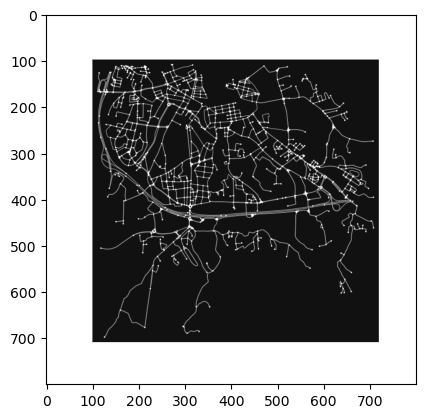

In [28]:
plt.imshow(gastonBergerImg)
plt.show()

In [29]:
print("Moyenne :", np.average(gastonBergerScore))
print("Médianne :", np.median(gastonBergerScore))
print("   ecart :", np.average(gastonBergerScore) - np.median(gastonBergerScore))
print("Ecart type :", np.std(gastonBergerScore))
print("Max :", max(gastonBergerScore))
print("   index :", getMaxIndex(gastonBergerScore))
print("Min :", min(gastonBergerScore))
print("   index :", getMinIndex(gastonBergerScore))
print("Etendue :", max(gastonBergerScore) - min(gastonBergerScore))

Moyenne : 0.026474270907398272
Médianne : 0.02282519543398861
   ecart : 0.003649075473409664
Ecart type : 0.009664065162126426
Max : 0.0639622756709573
   index : 228
Min : 0.010824795049995627
   index : 0
Etendue : 0.05313748062096167


On remarque que cette série a une très grande étendue et que la moyenne est bien supérieure à la médiane. Cela signifie qu'il existe dans le graphe concerné une ou plusieurs autorités beaucoup trop importantes, et qu'il n'y a pas vraiment d'entre-deux entre le score de cette autorité et les autres scores (très peux de valeurs entre). Ainsi, on en déduit qu'il existe certains points du réseau routier où le traffic est beaucoup plus important qu'à d'autres. 

### Toulon

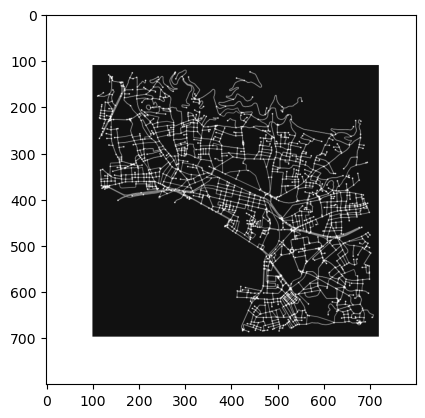

In [30]:
plt.imshow(toulonImg)
plt.show()

In [31]:
print("Moyenne :", np.average(toulonScore))
print("Médianne :", np.median(toulonScore))
print("   ecart :", np.average(toulonScore) - np.median(toulonScore))
print("Ecart type :", np.std(toulonScore))
print("Max :", max(toulonScore))
print("   index :", getMaxIndex(toulonScore))
print("Min :", min(toulonScore))
print("   index :", getMinIndex(toulonScore))
print("Etendue :", max(toulonScore) - min(toulonScore))

Moyenne : 0.021398193891173835
Médianne : 0.018909488294261853
   ecart : 0.0024887055969119824
Ecart type : 0.008272429369261206
Max : 0.07214972343882384
   index : 517
Min : 0.008271048895722704
   index : 24
Etendue : 0.06387867454310113


Cette fois, bien que l'étendue soit assez élevée, la moyenne est assez proche de la médiane. Cela signifie qu'il existe en effet une ou plusieurs autorités au score bien trop élevé, mais il existe plusieurs scores intermédiaires donc les scores sont assez bien répartis. Il serait quand même bénéfique à ce réseau routier d'augmenter le score des points les plus délaissés pour fluidifier le traffic.

## Partie 5 : PageRank - calcul direct des scores et comparaison d'algorithmes

Par manque de temps, nous n'avons pas pu traiter cette partie, ainsi que la partie 6.

Nous avons entâmé quelques recherches, notamment avec le pivot de Gauss, mais le temps restant n'a pas suffit pour arriver à une quelconque conclusion.

## Conclusion : Participations 

Nous avons utilisé GitHub pour le travail en commun sur ce devoir. Ainsi, les différents commit témoignent de l'implication de chacun. Notons que nous avons découvert avec ce devoir que GitHub n'est pas un outil adéquat pour travailler en commun sur un fichier jupyter notebook ; c'est la raison des quelques commit un peu maladroits. 

Lien du GitHub : https://github.com/GabrielROUGER22011455/SAE_S2_02

Pour ce qui est de la participation personnelle de chacun, il est difficile de la quantifier. En effet, cette SAE prenant place exactement en même temps qu'une autre SAE, avec des groupes identiques, la répartition des tâches était délicate. Certains se sont plus impliqués sur la S2.01, d'autres sur la S2.02 ; ainsi, nous avons décidé d'accorder malgré tout le même pourcentage de participation à chacun.

En conclusion, nous accordons à chaque membre du groupe un tier du pourcentage de participation, soit : 

###### Bastien Bougeard : 30%

    S'est chargé du support de présentation

###### Alexis Delin : 30%

    A récupéré toutes les données pour la partie 4

###### Gabriel Rouge : 40%

    Tout le reste

Notre groupe était supposé être composé de 4 étudiants ; or, Gavril Bosso a arrêté les cours, n'a pas été présent pour cette SAE, et ainsi n'a été indiqué nulle part sur ce rapport. 